
아래 강의 노트는 [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) 4장을 기반으로 번역 및 편집하여 페이지 구성함  
<img src="https://learning.oreilly.com/library/cover/9781491912126/250w/">
<font color ="blue"> **무단 배포를 금지 합니다.** </font>
***

<!--BOOK_INFORMATION-->

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

### Matplotlib의 3차원 

matplotlib 3D 참고 <a href="https://matplotlib.org/stable/gallery/index.html#d-plotting"> 여기</a>

Matplotlib은 2차원 플로팅만 염두에 두고 설계되었었다 1.0 버전 출시될 즈음에 Matplotlib의 2차원 디스플레이를 기반으로 몇개의 3차원 플로팅 유틸리티가 구축되었고, 그 결과 3차원 데이터 시각화를 위한 다소 제한적이지만 편리한 도구 집합을 얻게 되었다.  메인 Matplotlib 설치본에 포함된 ``mplot3d``툴킷을 import 해서 3차원 플롯을 만들 수 있다.

In [2]:
from mpl_toolkits import mplot3d

서브모듈을 임포트하고 나면 일반 축 생성 루틴에 ``projection='3d'``키워드를 전달해서 3차원 축을 만들 수 있다. 

In [3]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

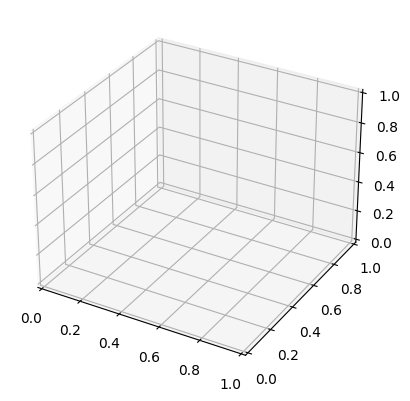

In [6]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
# projection='3d' 이것이 없으면 2차원

3D축을 만들었으니 이제 다양한 3차원 플롯 유형을 플로팅 할 수 있다. 3차원 플로팅은 노트북에서 정적이 아니라 대화식으로 그림을 볼 수 있다는 특징이 있다.  대화식 그림을 사용하려면 이 코드를 실행할때 ``%matplotlib inline``이 아닌 ``%matplotlib notebook`` 사용해야 한다.

## 3차원 점과 선

가장 기본적인 3차원 플롯은 (x, y, z) 트리플 집합으로 만들어지는 선이나 산점도이다. 2차원플롯과 유사하게 ``ax.plot3D`` 와 ``ax.scatter3D``함수를 사용해 3차원 플롯을 만들 수 있다. 

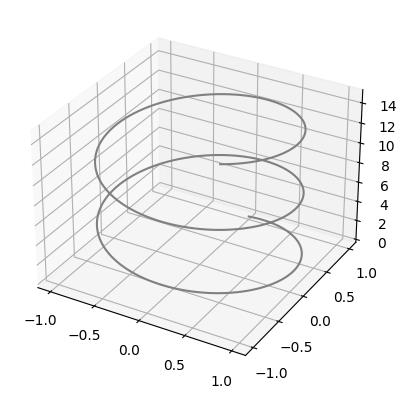

In [14]:
%matplotlib inline
# %matplotlib notebook 
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# x, y, z 값 집어넣고 

zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
plt.show()


<IPython.core.display.Javascript object>


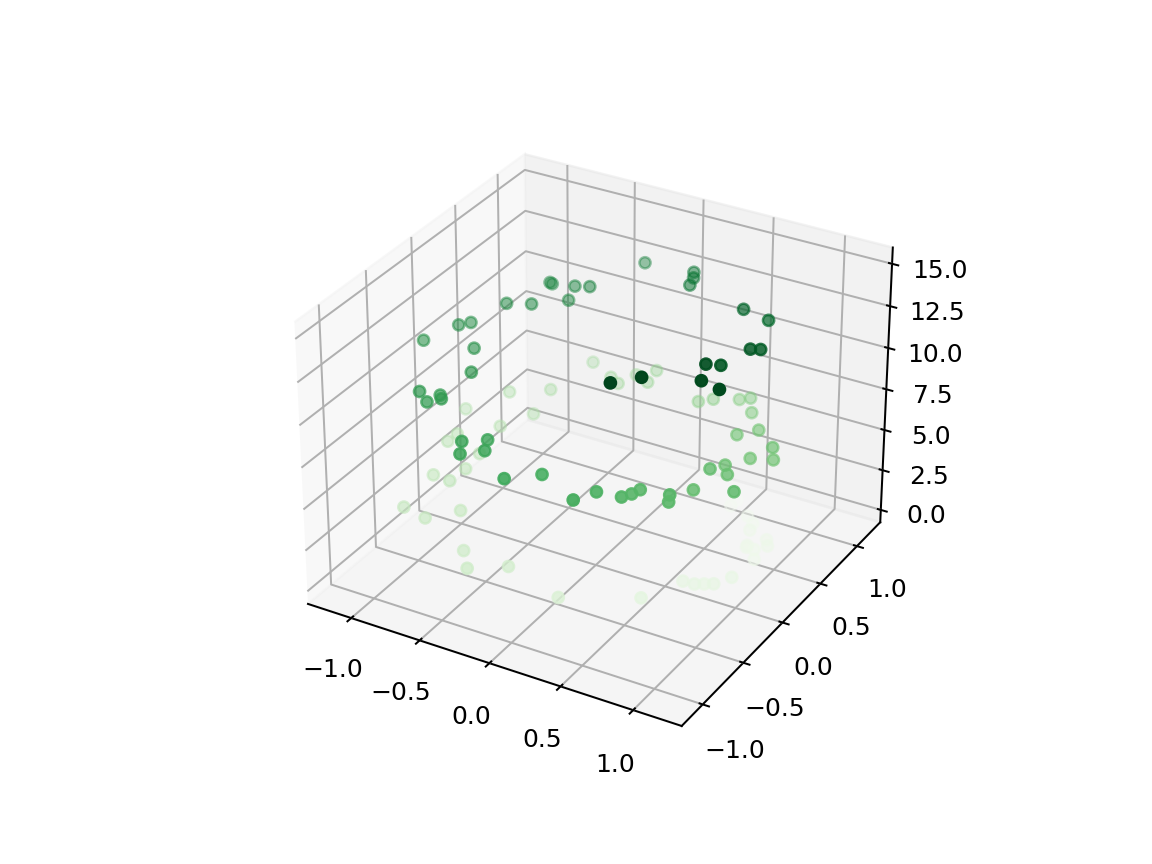

In [8]:
%matplotlib notebook
ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) 
# x랑 y값을 노이즈를 주고 전체적으로 봤을때는 위와 같지만 xy값으로 비집고 들어간 형태의 그림
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens'); # 흩뿌리기 
# c= 는 칼라
plt.show()

기본적으로 산포된 점은 페이지 상에서 깊이감이 느껴지도록 투명도를 조절 했다. 3차원 효과를 정적인 이미지에서 보기 어려울 때도 있지만 대화식 보기에서는 점의 배치에 대한 훌륭한 직관을 얻을 수 있다.

## 3차원 등고선 플롯


``mplot3d``에는 같은 입력값을 사용해 3차원으로 고저를 나타내는 플롯을 만드는 도구들이 있다. 2차원 ``ax.contour`` 플롯과 비슷하게  ``ax.contour3D``도 모든 입력 데이터가 2차원 정규 그리드 형태여야 하고 각 점에서 평가된 z 데이터를 가져야 한다. 


In [15]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30) # ''-6' ~ '6' 30개로 나누어져있음
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y) # numpy mashgrid x의 대한 좌표값, y에 대한 좌표값을 표현함 ㅅ
Z = f(X, Y)
Z
# viewpoint를 지정할 수 있음.
# 등고선 


array([[ 8.07261091e-01,  9.41437765e-01,  9.97705708e-01,
         9.80850719e-01,  9.02160390e-01,  7.77003505e-01,
         6.22348946e-01,  4.54593535e-01,  2.87954298e-01,
         1.33543814e-01, -8.84706779e-04, -1.10640850e-01,
        -1.93431827e-01, -2.48533645e-01, -2.75989644e-01,
        -2.75989644e-01, -2.48533645e-01, -1.93431827e-01,
        -1.10640850e-01, -8.84706779e-04,  1.33543814e-01,
         2.87954298e-01,  4.54593535e-01,  6.22348946e-01,
         7.77003505e-01,  9.02160390e-01,  9.80850719e-01,
         9.97705708e-01,  9.41437765e-01,  8.07261091e-01],
       [ 9.41437765e-01,  9.98937218e-01,  9.71132423e-01,
         8.69941049e-01,  7.12998635e-01,  5.20584150e-01,
         3.12742785e-01,  1.07000578e-01, -8.30932252e-02,
        -2.48533645e-01, -3.84629319e-01, -4.90176225e-01,
        -5.66292335e-01, -6.15169883e-01, -6.38962142e-01,
        -6.38962142e-01, -6.15169883e-01, -5.66292335e-01,
        -4.90176225e-01, -3.84629319e-01, -2.48533645e-

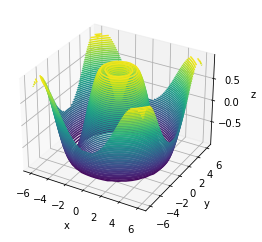

In [27]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50) # contour 와 surfice의 차이는 
# 등고선처럼 가로축애들을 엮은것
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

때로는 기본 시야각이 적절하지 않을 수 있는데, 이 경우 ``view_init``메서드를 사용해 고도와 방위각을 설정할 수 있다. 아래는 고도 60 x-y 평면위로 60도와 방위각 35도 (z축을 기준으로 시계반대방향으로 35도 회전)을 사용한 것이다. 

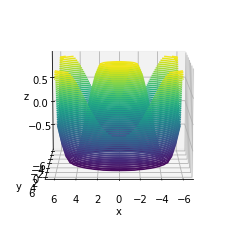

In [32]:
ax.view_init(10, 90) # view vhdlsxmrk ekfma
fig

## 와이어 프레임과 평면도
그리그 데이터 상에서 작동하는 또 다른 유형의 3차원 플롯으로 와이어프레임과 표면도가 있다.  
값의 그리드를 취해서 지정된 3차원 표면에 사영함으로써 3차원 형태의 결과를 아주 쉽게 시각화 할 수 있다. 
아래는 와이어 프레임을 사용한 예제  :

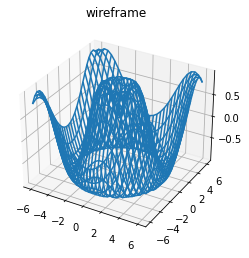

In [34]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe'); # 그물망 모양

표면도는 와이어프레임 그림과 비슷하지만 와이어프레임의 각 면이 다각형으로 채워져 있다. 채워진 다각형에 색상 지도를 추가하면 시각화된 표면의 위상을 파악할 수 있다. :

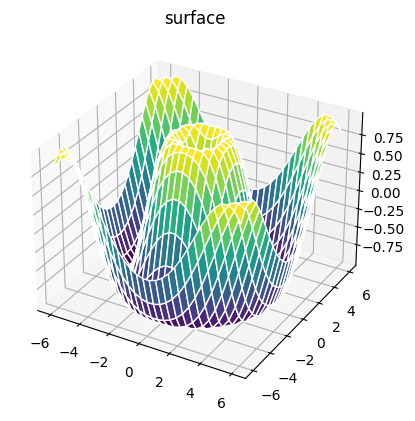

In [17]:
%matplotlib inline
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='white')
ax.set_title('surface');
# 면을 다 채움

표면 플롯의 값 그리드는 2차원이어야 하지만 직선일 필요는 없습니다. 다음은 부분 극좌표 그리드(partial polar grid) 를 생성하는 예이고 ``surface3D`` 플롯과 함께 사용하면 시각화하는 기능에 대한 슬라이스를 얻을 수 있습니다.

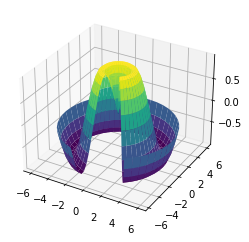

In [27]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none');

## 표면 삼각 측량법


일부 응용 프로그램의 경우 위의 루틴에서 요구하는 고르게 샘플링된 grid는 지나치게 제한적이고 불편합니다. 이러한 상황에서 삼각분할 기반 플롯은 매우 유용할 수 있습니다. 데카르트 또는 극좌표 그리드에서 고르게 뽑는 대신 무작위로 뽑는 세트가 있다면 어떨까요?



In [36]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

샘플링한 표면에 대한 아이디어를 얻기 위해 점으로 산점도를 만들었다.:

In [39]:

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

이 플롯은 아쉬운점이 많다. 이경우에는 인접한 점들 사이에 형성된 삼각형 집합을 먼저 구해 표면을 구성하는 ``ax.plot_trisurf``함수가 도움이 된다. :

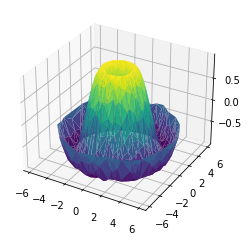

In [30]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

결과가 확실히 그리드로 그린 것만큼분명하게 보이지는 않지만, 삼각측량의 유연성 덕분에 몇가지 정말 흥미로운 3차원 그림을 그릴 수 있다. 